In [39]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [40]:
(X_train,y_train), (X_test,y_test)=keras.datasets.mnist.load_data()

In [41]:
len(X_train)

60000

In [42]:
len(X_test)

10000

In [43]:
X_train[0].shape

(28, 28)

In [44]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

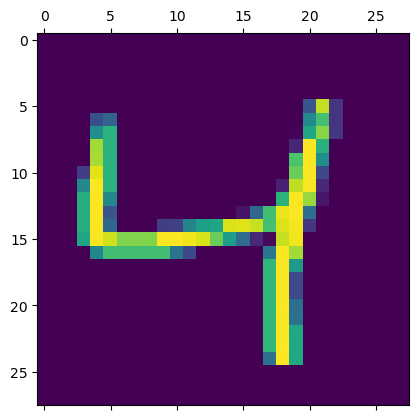

In [45]:
plt.matshow(X_train[2])

In [46]:
y_train[2]

4

In [47]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [48]:
X_train=X_train/255
X_test=X_test/255


#  Flattening 


In [49]:
X_train.shape   # 28* 28 each image size

(60000, 28, 28)

In [50]:
X_train_flattended=X_train.reshape(len(X_train),28*28)
X_train_flattended.shape

(60000, 784)

In [51]:
X_test_flattended=X_test.reshape(len(X_test),28*28)
X_test_flattended.shape

(10000, 784)

In [52]:
X_train_flattended[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Create a simple neural netwrok

In [53]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4669 - accuracy: 0.8786
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3041 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2669 - accuracy: 0.9252


In [54]:
model.evaluate(X_test_flattended,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2661 - accuracy: 0.9261


[0.26612967252731323, 0.9261000156402588]

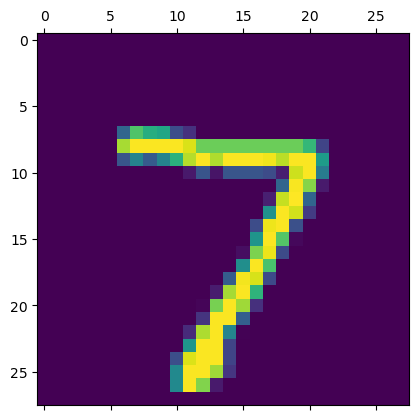

In [55]:
plt.matshow(X_test[0])

In [56]:
y_predicted=model.predict(X_test_flattended)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([1.48350000e-02, 3.38546073e-07, 6.67460188e-02, 9.51104164e-01,
       2.24815961e-03, 1.15246706e-01, 1.11363079e-06, 9.99721467e-01,
       7.14713633e-02, 5.61199665e-01], dtype=float32)

In [57]:
#look at the maximum score

np.argmax(y_predicted[0])

7

In [58]:
y_predicted[1]

array([2.0670688e-01, 4.3359110e-03, 9.9935657e-01, 2.8732148e-01,
       5.6236071e-10, 9.0394664e-01, 8.5645163e-01, 5.5699141e-13,
       1.8703459e-01, 2.9414886e-09], dtype=float32)

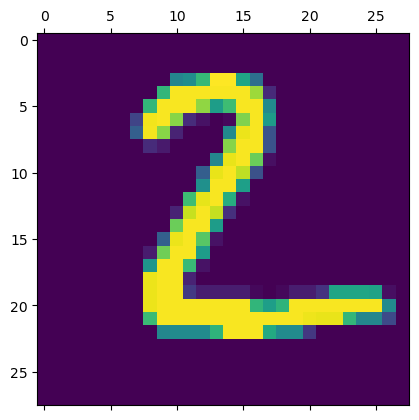

In [59]:
plt.matshow(X_test[1])

In [60]:
y_predicted=model.predict(X_test_flattended)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([2.0670688e-01, 4.3359110e-03, 9.9935657e-01, 2.8732148e-01,
       5.6236071e-10, 9.0394664e-01, 8.5645163e-01, 5.5699141e-13,
       1.8703459e-01, 2.9414886e-09], dtype=float32)

In [61]:
#look at the maximum score

np.argmax(y_predicted[1])

2

In [62]:
y_predicted_labels=[np.argmax(i)for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [63]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [64]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    6,   10,    2,    3,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   3,    8,  930,   16,    9,    6,   11,    9,   36,    4],
       [   1,    0,   23,  918,    0,   27,    2,   10,   22,    7],
       [   1,    1,    5,    2,  916,    0,   10,    4,   10,   33],
       [   7,    2,    2,   28,    9,  784,   15,    5,   33,    7],
       [  10,    3,    7,    1,    7,   15,  909,    2,    4,    0],
       [   1,    6,   25,    7,   10,    0,    0,  946,    3,   30],
       [   4,    6,    7,   19,    9,   25,    8,   11,  879,    6],
       [  10,    7,    1,    9,   28,    7,    0,   22,    8,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

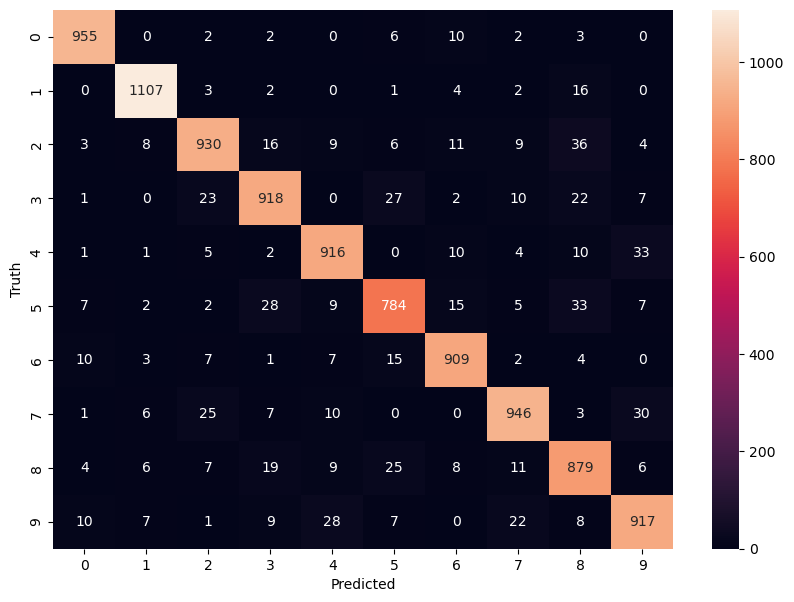

In [65]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Add hidden layer

In [66]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2793 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1268 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0864 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0659 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0525 - accuracy: 0.9836


In [67]:
model.evaluate(X_test_flattended,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9731


[0.08882119506597519, 0.9731000065803528]

In [68]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    2,    2,    0,    6,   10,    2,    3,    0],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   3,    8,  930,   16,    9,    6,   11,    9,   36,    4],
       [   1,    0,   23,  918,    0,   27,    2,   10,   22,    7],
       [   1,    1,    5,    2,  916,    0,   10,    4,   10,   33],
       [   7,    2,    2,   28,    9,  784,   15,    5,   33,    7],
       [  10,    3,    7,    1,    7,   15,  909,    2,    4,    0],
       [   1,    6,   25,    7,   10,    0,    0,  946,    3,   30],
       [   4,    6,    7,   19,    9,   25,    8,   11,  879,    6],
       [  10,    7,    1,    9,   28,    7,    0,   22,    8,  917]])>

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

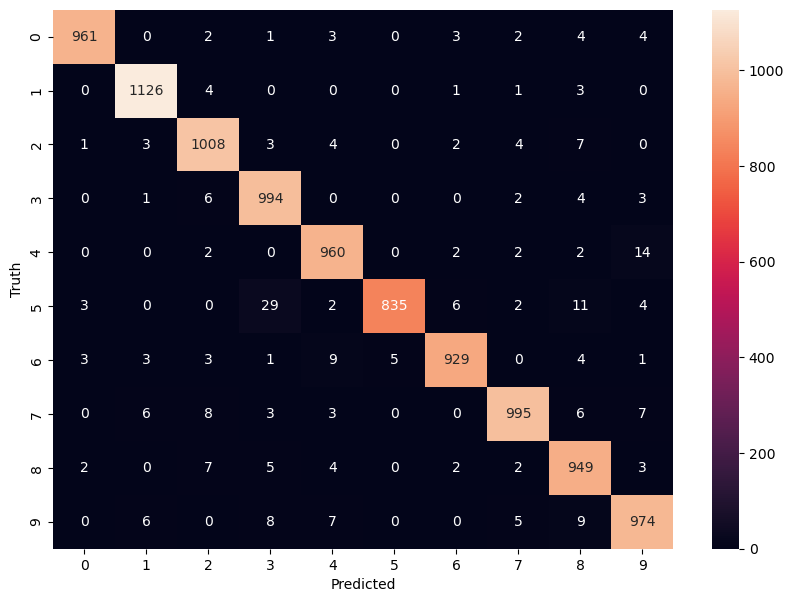

In [69]:
y_predicted=model.predict(X_test_flattended)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [70]:
# If i don`t want to add 

In [71]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2725 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1233 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0672 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0523 - accuracy: 0.9838


In [72]:
#Assignment - try with different loss functions

In [73]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                                               #10- output shape # input -784
    
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train_flattended,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7839 - accuracy: 0.8137
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4576 - accuracy: 0.8802
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4043 - accuracy: 0.8911
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3777 - accuracy: 0.8965
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3607 - accuracy: 0.9003


In [86]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                              #10- output shape # input -784

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


    
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train,y_train,epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2702 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1210 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0854 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0648 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0508 - accuracy: 0.9841


In [79]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [80]:
import tensorflow as tf
import datetime

In [87]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10452), started 0:24:01 ago. (Use '!kill 10452' to kill it.)

In [85]:
%reload_ext tensorboard


In [90]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
                                                      #Sequential- stack of neural networks, every layer as one element
])                                             # Dense- i/p layers connected with every other neuron on the second layers 
                              #10- output shape # input -784

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="log_dir/SGD", histogram_freq=1)


    
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(X_train,y_train,epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6529 - accuracy: 0.8397
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3369 - accuracy: 0.9054
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2876 - accuracy: 0.9193
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2570 - accuracy: 0.9276
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2343 - accuracy: 0.9341


In [93]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 10452), started 0:44:12 ago. (Use '!kill 10452' to kill it.)